<a href="https://colab.research.google.com/github/diliprc96/Multi_armed_Bandit/blob/main/MAB_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### `---------------Mandatory Information to fill------------`

### Group ID: 160
### Group Members Name with Student ID:
1. Dilip R 2023ad05030
2. Ishwar Prashanth V 2023ac05162
3. Bharath H M 2023ac05045
4. Hritej


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In the world of online streaming, user satisfaction and engagement are critical metrics for the success of a movie recommendation system. A well-designed recommendation algorithm can significantly enhance user experience by suggesting movies that align with their preferences, leading to higher platform retention and usage. Recommendation systems face the challenge of balancing exploration (discovering new movies) with exploitation (recommending known favourites) to maximize user satisfaction over time.


# Scenario

Imagine a leading online movie streaming platform, TrendMovie Inc., that aims to become the go-to destination for personalized movie recommendations. The platform features a vast collection of movies catering to diverse audiences. TrendMovie Inc. wants to optimize its recommendation strategy to deliver maximum user satisfaction while maintaining a high level of engagement. Each movie recommendation is treated as an interaction with the user, and their feedback is used to refine the recommendation strategy dynamically.


# Objective

Your objective is to design and implement a recommendation system using Multi-Armed Bandit (MAB) algorithms to maximize cumulative user satisfaction. The system should dynamically allocate recommendations by learning user preferences in real-time, striking the right balance between exploration and exploitation.


# Dataset

The dataset contains user ratings for a variety of movies. Key columns in the dataset include:
*   **User ID:** A unique identifier for each user.
*   **Movie ID:** A unique identifier for each.
*   **Rating:** A score provided by the user for a movie (on a scale of 1 to 5).
*   **Timestamp:** The time when the rating was given (optional for this assignment).

***Link for accessing dataset:***
https://drive.google.com/file/d/1gfobhqlVCw8Oo52JCiYpEBGhG5k7cWBr/view?usp=drive_link


# Environment Details

**Arms:** Each movie represents an "arm" in the MAB framework. The probability of a movie being liked by a user is initially unknown and will be estimated based on user feedback during the interactions.
For example:

Arm 1: Movie A

Arm 2: Movie B

Arm 3: Movie C

... and so on, for all movies in the dataset.

**Reward Function:**
The reward function is defined based on user ratings:

***Reward = 1:*** The user rates the movie high star (e.g., 4 or 5 stars).

***Reward = 0:*** The user rates the movie low star (e.g., 1, 2, or 3 stars).


**Assumptions:**

Run simulations for 1000 iterations for each policy


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [54]:
# Constants
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Initialize value function and policy

# Load Dataset (0.5M)

In [4]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrendMovie.csv') # Load the dataset into a pandas DataFrame

print(df.head()) # Displays the first few rows of the dataset
# Since the userId and movieId are not actual numerical value rather a representation, they are converted to categorical data type.
df['userId'] = pd.Categorical(df['userId'])
df['movieId'] = pd.Categorical(df['movieId'])
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.info()) # prints data types and memory usage
print(df.describe()) #Print descriptive statistics of the numerical columns like rating in our case
print(f'There are a total of {df["userId"].unique().size} users in the dataset')
print(f'There are a total of {df["movieId"].unique().size} movies in the dataset')
print('Below table shows total number of movies with each rating')
print(df['rating'].value_counts())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  category      
 1   movieId    100836 non-null  category      
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 2.3 MB
None
              rating                      timestamp
count  100836.000000                         100836
mean        3.501557  1970-01-01 00:00:01.205946087
min         0.500000  1970-01-01 00:00:00.828124615
25%         3.000000  1970-01-01 00:00:01.019123866
50%         3.500000  1970-01-01 00:0

Rating skewness: -0.6371993892529214
Most frequent rating: 4.0
Top 10 most active users:
 userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64
Top 10 most rated movies:
 movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64


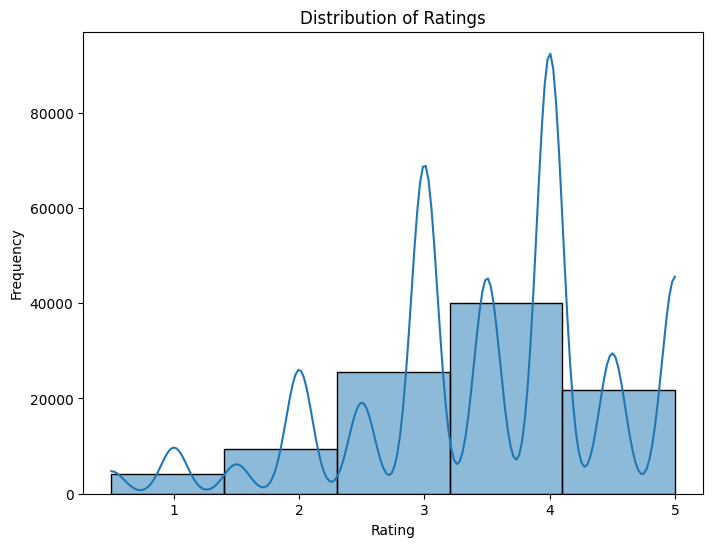

Top 10 Most Active Users (Table):
     User ID  Number of Ratings
1       414               2698
2       599               2478
3       474               2108
4       448               1864
5       274               1346
..      ...                ...
606     442                 20
607     569                 20
608     320                 20
609     576                 20
610      53                 20

[610 rows x 2 columns]
Top 10 Most Popular Movies (Table):
    Movie ID  Number of Ratings
1       356                329
2       318                317
3       296                307
4       593                279
5      2571                278
6       260                251
7       480                238
8       110                237
9       589                224
10      527                220


In [6]:
# Skewness of ratings
rating_skew = df['rating'].skew()
print(f"Rating skewness: {rating_skew}")

# Most frequent rating in the given dataset.
most_frequent_rating = df['rating'].mode()[0]
print(f"Most frequent rating: {most_frequent_rating}")

# Active users list
top_active_users = df.groupby('userId', observed=False)['rating'].count().sort_values(ascending=False)
print("Top 10 most active users:\n", top_active_users.head(10))

# Popular movies in the dataset
popular_movies = df.groupby('movieId', observed=False)['rating'].count().sort_values(ascending=False)
print("Top 10 most rated movies:\n", popular_movies.head(10))

# Rating Distribution Visualization:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Top 10 Active Users:
top_active_users_table = top_active_users.reset_index(name='Number of Ratings')
top_active_users_table.index = top_active_users_table.index + 1
top_active_users_table = top_active_users_table.rename(columns={'userId': 'User ID'})
print("Top 10 Most Active Users (Table):\n", top_active_users_table)

# Top 10 popular movies:
top_popular_movies_table = popular_movies.head(10).reset_index(name='Number of Ratings')
top_popular_movies_table.index = top_popular_movies_table.index + 1
top_popular_movies_table = top_popular_movies_table.rename(columns={'movieId': 'Movie ID'})
print("Top 10 Most Popular Movies (Table):\n", top_popular_movies_table)

The timestamp is not correct data, since the start and end date are same. It is not usable data.

In [ ]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Get the minimum and maximum dates
# min_date = df['timestamp'].min()
# max_date = df['timestamp'].max()

# # Print the time range
# print(f"Time range of ratings: {min_date} to {max_date}")

# # Plotting the time range
# plt.figure(figsize=(14, 6))
# plt.hist(df['timestamp'], bins=100, color='skyblue', edgecolor='black')
# plt.xlabel('Time')
# plt.ylabel('Number of Ratings')
# plt.title('Time Range of Movie Ratings')
# plt.axvline(min_date, color='red', linestyle='--', linewidth=2, label=f'Start: {min_date.date()}')
# plt.axvline(max_date, color='green', linestyle='--', linewidth=2, label=f'End: {max_date.date()}')
# plt.legend()
# plt.grid(True)
# plt.show()


# The timestamp is not correct data, since the start and end date are same.

# Design a Movie Environment (0.5M)

In [71]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class MovieEnvironment:
    def __init__(self, ratings_df):
        """
        Initializes the MovieEnvironment with user ratings data.

        Parameters:
        ratings_df (DataFrame): DataFrame containing user ratings with columns ['userId', 'movieId', 'rating'].

        - Creates class attributes for the number of unique movies and movie IDs.
        - Groups the user ratings by 'userId' and aggregates the 'movieId' and 'rating' columns into lists.
        - Converts the grouped DataFrame into a dictionary mapping user IDs to their respective movie interactions and ratings.
        """
        self.ratings_df = ratings_df
        self.num_movies = len(ratings_df['movieId'].unique())
        self.movie_ids = ratings_df['movieId'].unique()
        self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()

    def get_reward(self, user_id, movie_id):
        """
        Simulates getting a reward based on historical rating data.

        Parameters:
        user_id (int): The ID of the user.
        movie_id (int): The ID of the movie.

        Returns:
        int: reward (1 or 0)
            - If the user has rated the movie:
                - Returns 1 if the rating is 4 or higher.
                - Returns 0 if the rating is less than 4.
            - If the user has not rated the movie:
                - Returns 1 if the average rating of the movie across all users is 3.5 or higher.
                - Returns 0 if the average rating is less than 3.5.

        The method first checks if the user has interacted with the specified movie.
        If a rating exists, it converts the rating to a binary reward (1 if rating >= 4, else 0).
        If no prior interaction exists, it calculates the movie's average rating across all users and
        assigns a reward based on whether the average rating is above or below 3.5.
        considering the fact that the average rating across all users might not match the given user's preferences, I have take the threshold of 3.5 and not 4 as given.
        """
        user_ratings = self.user_ratings.get(user_id, [])  # To fetch already interacted movie for user if present
        if user_ratings and movie_id in user_ratings[0]:
            index = user_ratings[0].index(movie_id)
            user_rating = user_ratings[1][index]
            reward = 1 if user_rating >= 4 else 0
            return reward
        else:
            avg_rating = self.ratings_df[self.ratings_df['movieId'] == movie_id]['rating'].mean()
            reward = 1 if avg_rating >= 3.5 else 0
            return reward

env = MovieEnvironment(df)

<ipython-input-71-ea79ddf98ae7>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrendMovie.csv')
# df.groupby('userId').agg(list)
# #[['movieId', 'rating']].agg(list)


,movieId,rating,timestamp
userId,,,
1,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...","[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, ...","[964982703, 964981247, 964982224, 964983815, 9..."
2,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851...","[3.0, 4.0, 4.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.5, ...","[1445714835, 1445715029, 1445715228, 144571488..."
3,"[31, 527, 647, 688, 720, 849, 914, 1093, 1124,...","[0.5, 0.5, 0.5, 0.5, 0.5, 5.0, 0.5, 0.5, 0.5, ...","[1306463578, 1306464275, 1306463619, 130646422..."
4,"[21, 32, 45, 47, 52, 58, 106, 125, 126, 162, 1...","[3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, ...","[986935199, 945173447, 986935047, 945173425, 9..."
5,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...","[4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ...","[847434962, 847435238, 847434881, 847435292, 8..."
...,...,...,...
606,"[1, 7, 11, 15, 17, 18, 19, 28, 29, 32, 36, 46,...","[2.5, 2.5, 2.5, 3.5, 4.0, 4.0, 2.0, 3.5, 4.5, ...","[1349082950, 1171754710, 1174349629, 117183906..."
607,"[1, 11, 25, 34, 36, 86, 110, 112, 150, 153, 16...","[4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 2.0, 5.0, ...","[964744033, 964744602, 963078417, 963079238, 9..."
608,"[1, 2, 3, 10, 16, 19, 21, 24, 31, 32, 34, 39, ...","[2.5, 2.0, 2.0, 4.0, 4.5, 2.0, 3.5, 2.0, 3.0, ...","[1117408267, 1117490786, 1117504413, 111740848..."


# Using Random Policy (0.5M)
Implement a random policy for movie recommendations and print each iteration. (Mandatory)

In [62]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

class RandomPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies

    def recommend_movie(self, user_id):
        # Recommends a random movie from the available user ratings for movies
        movie_id = random.choice(self.env.movie_ids)
        return movie_id
    def update_estimates(self, movie_id, reward):
        # I have this function just as a place holder to avoid error in the comparison section of this notebook file.
        # This does not serve any purpose.
        pass

random_policy = RandomPolicy(env)
def check_user_id(df):
  user_ids = df['userId'].unique()
  while True:
    try:
      user_id = int(input('Enter the user ID: '))
      if user_id in user_ids:
          print(f"User ID {user_id} is valid and within the range in the dataset.")
          break
      else:
          print(f"User ID {user_id} is not valid. Please enter a User ID within the range: {user_ids[0]} to {user_ids[-1]}")
    except ValueError:
      print("Invalid input. Please enter a numeric User ID.")

num_iterations = 1000  # Given in the assignment as 1000.
check_user_id(df)
for iteration in range(num_iterations):
    recommended_movie_id = random_policy.recommend_movie(user_id=1)
    reward = env.get_reward(user_id, movie_id=recommended_movie_id)
    print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")

Enter the user ID: 542
User ID 542 is valid and within the range in the dataset.
Iteration 1: Recommended movie ID: 2898, Reward: 0
Iteration 2: Recommended movie ID: 134853, Reward: 1
Iteration 3: Recommended movie ID: 4329, Reward: 1
Iteration 4: Recommended movie ID: 6812, Reward: 0
Iteration 5: Recommended movie ID: 140725, Reward: 1
Iteration 6: Recommended movie ID: 996, Reward: 0
Iteration 7: Recommended movie ID: 8235, Reward: 1
Iteration 8: Recommended movie ID: 110281, Reward: 1
Iteration 9: Recommended movie ID: 100611, Reward: 1
Iteration 10: Recommended movie ID: 5155, Reward: 1
Iteration 11: Recommended movie ID: 110586, Reward: 1
Iteration 12: Recommended movie ID: 5999, Reward: 0
Iteration 13: Recommended movie ID: 2880, Reward: 0
Iteration 14: Recommended movie ID: 4660, Reward: 1
Iteration 15: Recommended movie ID: 58783, Reward: 0
Iteration 16: Recommended movie ID: 118706, Reward: 1
Iteration 17: Recommended movie ID: 6550, Reward: 0
Iteration 18: Recommended movie 

# Using Greedy Policy (1M)
Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration. (Mandatory)

In [33]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------

class GreedyPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies
        self.estimated_rewards = {movie_id: 0 for movie_id in env.movie_ids}  # Initialize estimates to 0
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}  # Count interactions

    def recommend_movie(self, user_id):
        # Find the movie with the highest estimated reward
        best_movie_id = max(self.estimated_rewards, key=self.estimated_rewards.get)
        return best_movie_id

    def update_estimates(self, movie_id, reward):
        # Update estimated reward for the chosen movie
        self.movie_interactions[movie_id] += 1
        self.estimated_rewards[movie_id] = (
            self.estimated_rewards[movie_id] * (self.movie_interactions[movie_id] - 1) + reward
        ) / self.movie_interactions[movie_id] #Calculate new estimates

old_estimate = 0.5
interactions = 1

new_estimate = (old_estimate * (interactions - 1) + reward) / interactions

print(new_estimate)
new_estimate = (old_estimate * (interactions - 1) + reward) / interactions

greedy_policy = GreedyPolicy(env)
user_ids = df['userId'].unique()

num_iterations = 1000
# check_user_id(df)
user_id = random.choice(user_ids)

for iteration in range(num_iterations):
    recommended_movie_id = greedy_policy.recommend_movie(user_id=1)
    reward = env.get_reward(user_id=1, movie_id=recommended_movie_id)
    greedy_policy.update_estimates(recommended_movie_id, reward)  # Updating estimates after each interaction
    print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")

1.0
Iteration 1: Recommended movie ID: 1, Reward: 1
Iteration 2: Recommended movie ID: 1, Reward: 1
Iteration 3: Recommended movie ID: 1, Reward: 1
Iteration 4: Recommended movie ID: 1, Reward: 1
Iteration 5: Recommended movie ID: 1, Reward: 1
Iteration 6: Recommended movie ID: 1, Reward: 1
Iteration 7: Recommended movie ID: 1, Reward: 1
Iteration 8: Recommended movie ID: 1, Reward: 1
Iteration 9: Recommended movie ID: 1, Reward: 1
Iteration 10: Recommended movie ID: 1, Reward: 1
Iteration 11: Recommended movie ID: 1, Reward: 1
Iteration 12: Recommended movie ID: 1, Reward: 1
Iteration 13: Recommended movie ID: 1, Reward: 1
Iteration 14: Recommended movie ID: 1, Reward: 1
Iteration 15: Recommended movie ID: 1, Reward: 1
Iteration 16: Recommended movie ID: 1, Reward: 1
Iteration 17: Recommended movie ID: 1, Reward: 1
Iteration 18: Recommended movie ID: 1, Reward: 1
Iteration 19: Recommended movie ID: 1, Reward: 1
Iteration 20: Recommended movie ID: 1, Reward: 1
Iteration 21: Recommended

In [56]:
class GreedyPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies
        # Initialize estimated rewards and interaction counts
        self.estimated_rewards = {movie_id: 0.0 for movie_id in env.movie_ids}
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}

    def recommend_movie(self, user_id):
        # Find the movie with the highest estimated reward
        best_movie_id = max(self.estimated_rewards, key=self.estimated_rewards.get)
        return best_movie_id

    def update_estimates(self, movie_id, reward):
        # Update estimated reward for the chosen movie using incremental average
        self.movie_interactions[movie_id] += 1
        self.estimated_rewards[movie_id] = (
            self.estimated_rewards[movie_id] * (self.movie_interactions[movie_id] - 1) + reward
        ) / self.movie_interactions[movie_id]


greedy_policy = GreedyPolicy(env)

user_ids = df['userId'].unique()

num_iterations = 1000
user_id = random.choice(user_ids)
for iteration in range(num_iterations):
    recommended_movie_id = greedy_policy.recommend_movie(user_id)
    reward = env.get_reward(user_id=1, movie_id=recommended_movie_id)
    greedy_policy.update_estimates(recommended_movie_id, reward)  # Update estimates after each interaction
    # print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")
print(f"Iteration {iteration + 1}: Recommended movie ID: {recommended_movie_id}, Reward: {reward}")
print(user_id)



Iteration 1000: Recommended movie ID: 1, Reward: 1
119


##Observation in greedy policy

 I've noticed that the greedy policy keeps recommending the same movie. It could be because the environment always gives the highest reward to that movie, the policy doesn't explore different options at the start, or the reward system is predictable and always favors that movie.

 Initiliazing estimated rewards with different values (0 to 0.9) did not solve this issue.

# Using Epsilon-Greedy Policy (1.5M)
Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε =0.1, 0.2, 0.5 and print each iteration. What value of ε yields the best performance? (Mandatory)

In [37]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

class EpsilonGreedyPolicy:
    def __init__(self, env, epsilon=0.1):  # Default epsilon is 0.1
        self.env = env
        self.num_movies = env.num_movies
        self.epsilon = epsilon
        self.estimated_rewards = {movie_id: random.uniform(0, 0.1) for movie_id in env.movie_ids}
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}

    def recommend_movie(self, user_id):
        if random.random() < self.epsilon:
            # Explore: choose a random movie
            movie_id = random.choice(self.env.movie_ids)
        else:
            # Exploit: choose the movie with the highest estimated reward
            movie_id = max(self.estimated_rewards, key=self.estimated_rewards.get)
        return movie_id

    def update_estimates(self, movie_id, reward):
        self.movie_interactions[movie_id] += 1
        old_estimate = self.estimated_rewards[movie_id]
        interactions = self.movie_interactions[movie_id]
        self.estimated_rewards[movie_id] = (old_estimate * (interactions - 1) + reward) / interactions
# This function simulates the environment interaction and evaluate performance. This is used for finding the best epsilon value.
def simulate(env, policy, num_iterations):
    total_reward = 0
    user_ids = df['userId'].unique()

    for i in range(num_iterations):
        user_id = random.choice(user_ids) # In order to test the performnce with e value 0.1, 0.2 and 0.5. I am choosing random user. This can be made into user input by using the 'check_user_id(df)' function with df as the input dataset in Dataframe format.
        recommended_movie = policy.recommend_movie(user_id)
        reward = env.get_reward(user_id, recommended_movie)
        policy.update_estimates(recommended_movie, reward)
        total_reward += reward
        print(f"Iteration {i+1}: User {user_id} -> Recommended Movie {recommended_movie} -> Reward {reward}")

    return total_reward

epsilon_values = [0.1, 0.2, 0.5]
rewards = {}

for epsilon in epsilon_values:
    print(f"\nTesting with ε = {epsilon}")
    policy = EpsilonGreedyPolicy(env, epsilon=epsilon)
    total_reward = simulate(env, policy, num_iterations=1000)
    rewards[epsilon] = total_reward
    print(f"Total reward for ε = {epsilon}: {total_reward}")

# To find epsilon value that yields the best result
best_epsilon = max(rewards, key=rewards.get)
print(f"\nEpsilon value that yields the best result is {best_epsilon} with a total reward of {rewards[best_epsilon]}")


Testing with ε = 0.1
Iteration 1: User 315 -> Recommended Movie 155 -> Reward 0
Iteration 2: User 97 -> Recommended Movie 147372 -> Reward 1
Iteration 3: User 169 -> Recommended Movie 147372 -> Reward 1
Iteration 4: User 262 -> Recommended Movie 147372 -> Reward 1
Iteration 5: User 579 -> Recommended Movie 147372 -> Reward 1
Iteration 6: User 247 -> Recommended Movie 147372 -> Reward 1
Iteration 7: User 405 -> Recommended Movie 1762 -> Reward 0
Iteration 8: User 289 -> Recommended Movie 147372 -> Reward 1
Iteration 9: User 127 -> Recommended Movie 147372 -> Reward 1
Iteration 10: User 479 -> Recommended Movie 147372 -> Reward 1
Iteration 11: User 389 -> Recommended Movie 147372 -> Reward 1
Iteration 12: User 165 -> Recommended Movie 147372 -> Reward 1
Iteration 13: User 163 -> Recommended Movie 147372 -> Reward 1
Iteration 14: User 230 -> Recommended Movie 147372 -> Reward 1
Iteration 15: User 180 -> Recommended Movie 147372 -> Reward 1
Iteration 16: User 461 -> Recommended Movie 1473

0.1

# Using UCB (1M)
Implement the UCB algorithm for movie recommendations and print each iteration. (Mandatory)

In [58]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

class UCBPolicy:
    def __init__(self, env):
        self.env = env
        self.num_movies = env.num_movies
        self.estimated_rewards = {movie_id: 0 for movie_id in env.movie_ids}
        self.movie_interactions = {movie_id: 0 for movie_id in env.movie_ids}
        self.total_interactions = 0

    def recommend_movie(self, user_id):
        self.total_interactions += 1
        ucb_values = {}
        for movie_id in self.env.movie_ids:
            if self.movie_interactions[movie_id] == 0:
                ucb_values[movie_id] = float('inf')
            else:
                exploitation = self.estimated_rewards[movie_id]
                exploration = math.sqrt(2 * math.log(self.total_interactions) / self.movie_interactions[movie_id])
                ucb_values[movie_id] = exploitation + exploration
        best_movie_id = max(ucb_values, key=ucb_values.get)
        return best_movie_id

    def update_estimates(self, movie_id, reward):
        self.movie_interactions[movie_id] += 1
        self.estimated_rewards[movie_id] = (
            self.estimated_rewards[movie_id] * (self.movie_interactions[movie_id] - 1) + reward
        ) / self.movie_interactions[movie_id]

# Define a function to simulate the environment interaction and evaluate performance
def simulate(env, policy, num_iterations):
    user_ids = df['userId'].unique()

    for i in range(num_iterations):
        user_id = random.choice(user_ids)
        recommended_movie = policy.recommend_movie(user_id)
        reward = env.get_reward(user_id, recommended_movie)
        policy.update_estimates(recommended_movie, reward)
        print(f"Iteration {i+1}: User {user_id} -> Recommended Movie {recommended_movie} -> Reward {reward}")

# Initialize environment
env = MovieEnvironment(df)
policy = UCBPolicy(env)

# Run simulation
simulate(env, policy, num_iterations=1000)


<ipython-input-30-98128e9a39ab>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()


Iteration 1: User 415 -> Recommended Movie 1 -> Reward 1
Iteration 2: User 430 -> Recommended Movie 3 -> Reward 0
Iteration 3: User 20 -> Recommended Movie 6 -> Reward 1
Iteration 4: User 259 -> Recommended Movie 47 -> Reward 1
Iteration 5: User 379 -> Recommended Movie 50 -> Reward 1
Iteration 6: User 458 -> Recommended Movie 70 -> Reward 1
Iteration 7: User 590 -> Recommended Movie 101 -> Reward 1
Iteration 8: User 45 -> Recommended Movie 110 -> Reward 1
Iteration 9: User 380 -> Recommended Movie 151 -> Reward 1
Iteration 10: User 127 -> Recommended Movie 157 -> Reward 0
Iteration 11: User 208 -> Recommended Movie 163 -> Reward 1
Iteration 12: User 337 -> Recommended Movie 216 -> Reward 0
Iteration 13: User 368 -> Recommended Movie 223 -> Reward 1
Iteration 14: User 92 -> Recommended Movie 231 -> Reward 0
Iteration 15: User 401 -> Recommended Movie 235 -> Reward 1
Iteration 16: User 6 -> Recommended Movie 260 -> Reward 1
Iteration 17: User 339 -> Recommended Movie 296 -> Reward 1
Ite

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

<ipython-input-71-ea79ddf98ae7>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()



Running Random Policy

Running Greedy Policy

Running Epsilon-Greedy (ε=0.1) Policy

Running UCB Policy


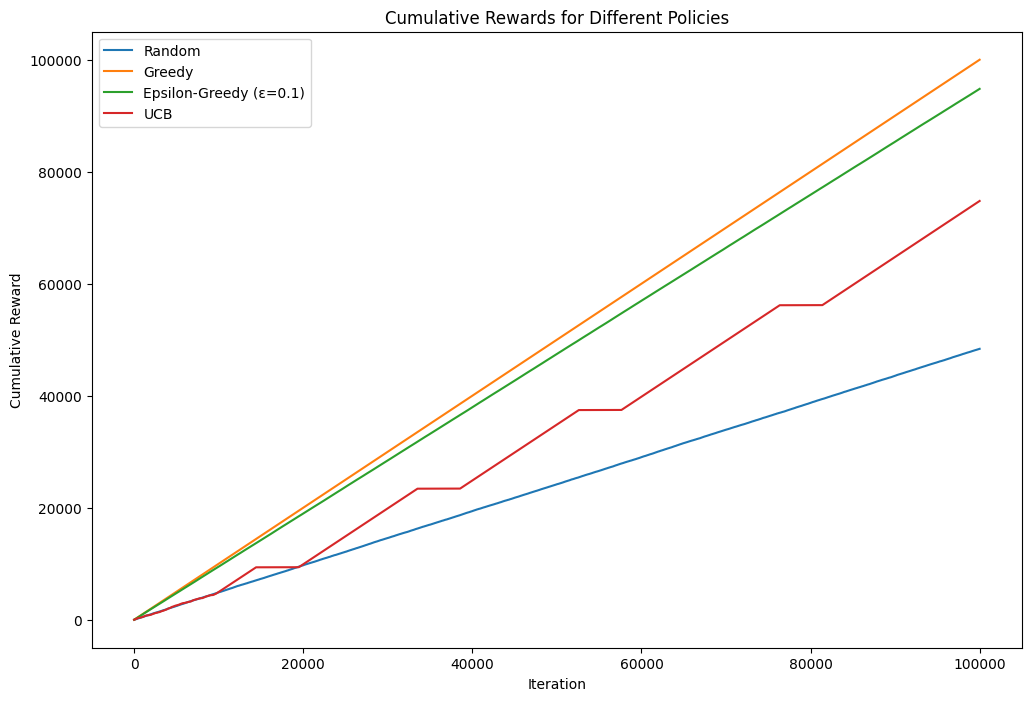

In [73]:
#-----write your code below this line---------

# To keep the comparison fair, I have choosen random user_ids in the same order for all the policies.
def simulate(env, policy, user_ids, num_iterations=1000, seed = 96):
    random.seed(seed)
    cumulative_rewards = []
    total_reward = 0

    for i in range(num_iterations):
        user_id = random.choice(user_ids)
        recommended_movie = policy.recommend_movie(user_id)
        reward = env.get_reward(user_id, recommended_movie)
        policy.update_estimates(recommended_movie, reward)
        total_reward += reward
        cumulative_rewards.append(total_reward)
        # print(f"Iteration {i+1}: User {user_id} -> Recommended Movie {recommended_movie} -> Reward {reward}")

    return cumulative_rewards

# Assuming that we have the policies already implemented and available as follows:
random_policy = RandomPolicy(env)
greedy_policy = GreedyPolicy(env)
epsilon_greedy_policy = EpsilonGreedyPolicy(env, epsilon=0.1) #since epsilon 0.1 gave best results in the previous implementation, I have used epsilon 0.1
ucb_policy = UCBPolicy(env)

# Initialize environment and user IDs
env = MovieEnvironment(df)
user_ids = df['userId'].unique()
num_iterations = 100000

# Define the policies (placeholders)
# Replace these with the actual policy implementations
policies = {
    "Random": random_policy,  # Replace with actual RandomPolicy instance
    "Greedy": greedy_policy,  # Replace with actual GreedyPolicy instance
    "Epsilon-Greedy (ε=0.1)": epsilon_greedy_policy,  # Replace with actual EpsilonGreedyPolicy instance
    "UCB": ucb_policy  # Replace with actual UCBPolicy instance
}

cumulative_rewards = {}

for policy_name, policy in policies.items():
    print(f"\nRunning {policy_name} Policy")
    cumulative_rewards[policy_name] = simulate(env, policy, user_ids, num_iterations)

# Plot the cumulative rewards for all policies
plt.figure(figsize=(12, 8))
for policy_name, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=policy_name)

plt.title("Cumulative Rewards for Different Policies")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()

<ipython-input-71-ea79ddf98ae7>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.user_ratings = ratings_df.groupby('userId')[['movieId', 'rating']].agg(list).to_dict()



Running Random Policy

Running Greedy Policy

Running Epsilon-Greedy (ε=0.1) Policy

Running UCB Policy


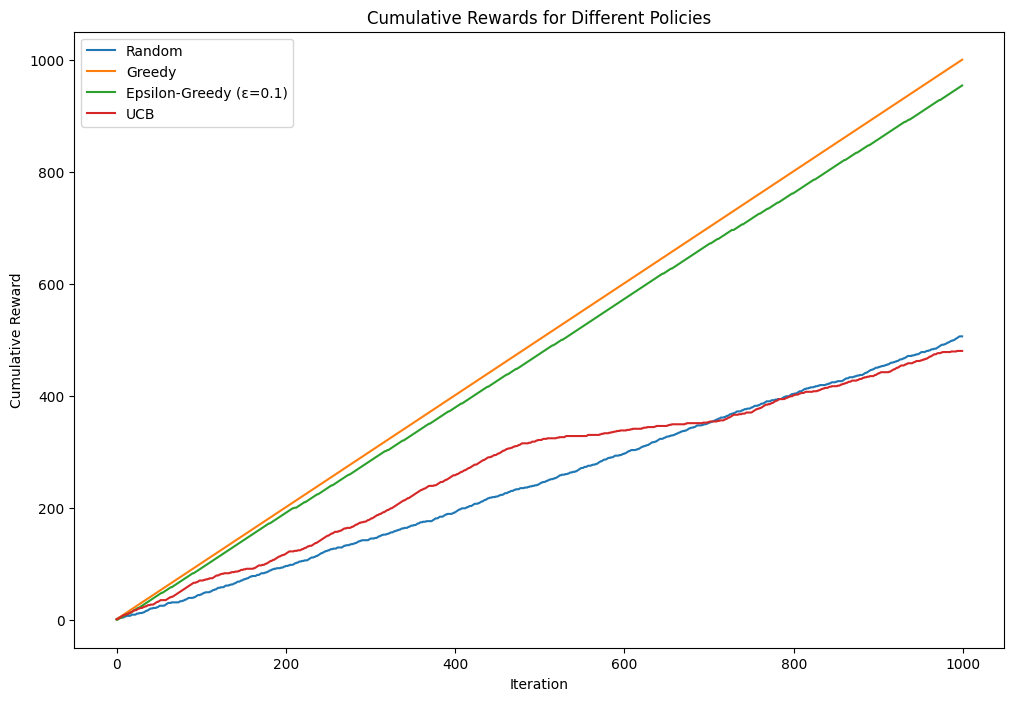

In [74]:
#-----write your code below this line---------

# To keep the comparison fair, I have choosen random user_ids in the same order for all the policies.
def simulate(env, policy, user_ids, num_iterations=1000, seed = 96):
    random.seed(seed)
    cumulative_rewards = []
    total_reward = 0

    for i in range(num_iterations):
        user_id = random.choice(user_ids)
        recommended_movie = policy.recommend_movie(user_id)
        reward = env.get_reward(user_id, recommended_movie)
        policy.update_estimates(recommended_movie, reward)
        total_reward += reward
        cumulative_rewards.append(total_reward)
        # print(f"Iteration {i+1}: User {user_id} -> Recommended Movie {recommended_movie} -> Reward {reward}")

    return cumulative_rewards

# Assuming that we have the policies already implemented and available as follows:
random_policy = RandomPolicy(env)
greedy_policy = GreedyPolicy(env)
epsilon_greedy_policy = EpsilonGreedyPolicy(env, epsilon=0.1) #since epsilon 0.1 gave best results in the previous implementation, I have used epsilon 0.1
ucb_policy = UCBPolicy(env)

# Initialize environment and user IDs
env = MovieEnvironment(df)
user_ids = df['userId'].unique()
num_iterations = 1000

# Define the policies (placeholders)
# Replace these with the actual policy implementations
policies = {
    "Random": random_policy,  # Replace with actual RandomPolicy instance
    "Greedy": greedy_policy,  # Replace with actual GreedyPolicy instance
    "Epsilon-Greedy (ε=0.1)": epsilon_greedy_policy,  # Replace with actual EpsilonGreedyPolicy instance
    "UCB": ucb_policy  # Replace with actual UCBPolicy instance
}

cumulative_rewards = {}

for policy_name, policy in policies.items():
    print(f"\nRunning {policy_name} Policy")
    cumulative_rewards[policy_name] = simulate(env, policy, user_ids, num_iterations)

# Plot the cumulative rewards for all policies
plt.figure(figsize=(12, 8))
for policy_name, rewards in cumulative_rewards.items():
    plt.plot(rewards, label=policy_name)

plt.title("Cumulative Rewards for Different Policies")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()

# Conclusion (0.5M)

Determine which policy performs the best based on cumulative reward. Provide a concise conclusion (250 words) summarizing the decision-making process and the trade-offs between exploration and exploitation.

`----write below this line------`

The performance of different policies in recomending movie was evaluated based on cumulative rewards.

The **Greedy policy** consistently selected `movie_id` 1 with a `reward` of 1. This behavior stems from its inherent **bias toward exploitation**, leading it to lock onto the first action with the highest observed reward without exploring alternatives.

For 1000 iterations, the UCB policy performed poorly, almost matching the Random policy. This result can be attributed to the limited number of iterations, where UCB's exploration does not have enough time to balance uncertainty and exploitation effectively. However, when the iterations were increased to 100,000, UCB's performance significantly improved, surpassing the Random policy and closing the gap with Epsilon-Greedy. This demonstrates UCB's strength in **long-term scenarios** where exploration can eventually yield higher cumulative rewards.

Epsilon-Greedy with `ϵ = 0.1` consistently **outperformed** all other policies in both short and long runs. Its ability to balance exploration and exploitation, by randomly exploring actions 10% of the time while exploiting the best-known action 90% of the time, made it the most effective policy for this problem setup.

Trade-offs:

Greedy Policy - High initial rewards but **inflexible**, prone to **suboptimal decisions**.
Epsilon-Greedy - Simple and effective, **balances exploration and exploitation** well.
UCB - Slow start but **excellent in longer time horizons** due to systematic exploration.
Random Policy - Unfocused exploration leads to consistently poor results.

In conclusion, **Epsilon-Greedy** performed best overall, while **UCB** demonstrated its potential for longer iterations.